![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   


# import

In [213]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split


In [214]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [215]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [216]:
df_train = pd.read_csv('main_task.csv')
df_test = pd.read_csv('kaggle_task.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [217]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [218]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [219]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      10000 non-null  object 
 1   City               10000 non-null  object 
 2   Cuisine Style      7693 non-null   object 
 3   Ranking            10000 non-null  float64
 4   Price Range        6525 non-null   object 
 5   Number of Reviews  9343 non-null   float64
 6   Reviews            9998 non-null   object 
 7   URL_TA             10000 non-null  object 
 8   ID_TA              10000 non-null  object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [220]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [221]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [222]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant_id  10000 non-null  object 
 1   Rating         10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [223]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [224]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [225]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
45646,id_598,Edinburgh,"['Seafood', 'Bar', 'British', 'Scottish', 'Glu...",599.0,$$ - $$$,162.0,"[['Great buzz', 'Haggis'], ['12/17/2017', '11/...",/Restaurant_Review-g186525-d3228592-Reviews-Ha...,d3228592,1,4.0
17826,id_1041,Dublin,"['Irish', 'Cafe', 'International', 'European']",1043.0,$,28.0,"[['Great little spot', 'quaint little cafe - g...",/Restaurant_Review-g186605-d2718800-Reviews-Me...,d2718800,1,4.5
47349,id_1846,Barcelona,"['Mediterranean', 'European', 'Spanish', 'Vege...",1847.0,$$ - $$$,97.0,"[['Elbow surprise', 'Excellent!!!'], ['12/29/2...",/Restaurant_Review-g187497-d12785973-Reviews-E...,d12785973,1,4.5
41185,id_35,Vienna,"['German', 'Austrian', 'European', 'Central Eu...",36.0,$$ - $$$,812.0,"[['Typical Viennese food', 'Traditional Vienne...",/Restaurant_Review-g190454-d1888282-Reviews-Hu...,d1888282,1,4.5
9221,id_9221,London,"['Indian', 'Asian', 'Halal', 'Vegetarian Frien...",14458.0,$$ - $$$,10.0,"[['Consistently good and inexpensive', 'Not ve...",/Restaurant_Review-g186338-d2266330-Reviews-Mi...,d2266330,0,0.0


In [226]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [227]:
# Для примера я возьму столбец Number of Reviews
data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')

In [228]:
data['Number_of_Reviews_isNAN']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: Number_of_Reviews_isNAN, Length: 50000, dtype: uint8

In [229]:
# Далее заполняем пропуски 0, вы можете попробовать заполнением средним или средним по городу и тд...
data['Number of Reviews'].fillna(0, inplace=True)

### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [230]:
data.nunique(dropna=False)

Restaurant_id              13094
City                          31
Cuisine Style              10732
Ranking                    12975
Price Range                    4
Number of Reviews           1574
Reviews                    41858
URL_TA                     49963
ID_TA                      49963
sample                         2
Rating                        10
Number_of_Reviews_isNAN        2
dtype: int64

Какие признаки можно считать категориальными?

Для кодирования категориальных признаков есть множество подходов:
* Label Encoding
* One-Hot Encoding
* Target Encoding
* Hashing

Выбор кодирования зависит от признака и выбраной модели.
Не будем сейчас сильно погружаться в эту тематику, давайте посмотрим лучше пример с One-Hot Encoding:
![](https://i.imgur.com/mtimFxh.png)

In [231]:
# для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
data = pd.get_dummies(data, columns=[ 'City',], dummy_na=True)

In [232]:
data.head(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
0,id_0,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,id_1,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,id_2,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,id_3,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,id_4,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [233]:
data.sample(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
37153,id_16291,['Pizza'],16303.0,$,8.0,"[['Terrible customer service, my daughter did....",/Restaurant_Review-g186338-d5818787-Reviews-Do...,d5818787,1,1.0,...,0,0,0,0,0,0,0,0,0,0
21685,id_13191,NaN,13193.0,NaN,7.0,"[['great views, nice food at reasonable price....",/Restaurant_Review-g187147-d1091107-Reviews-Le...,d1091107,1,3.5,...,0,0,1,0,0,0,0,0,0,0
21582,id_8301,['Delicatessen'],8302.0,NaN,0.0,"[[], []]",/Restaurant_Review-g187147-d7112143-Reviews-Ko...,d7112143,1,5.0,...,0,0,1,0,0,0,0,0,0,0
34766,id_2440,['Vegetarian Friendly'],2446.0,$$ - $$$,21.0,"[['Good food but a local focus', 'Amazing Food...",/Restaurant_Review-g188590-d10453600-Reviews-R...,d10453600,1,4.0,...,0,0,0,0,0,0,0,0,0,0
41292,id_990,NaN,992.0,NaN,12.0,"[['A hidden gem', 'Best Place For Waffles, Cof...",/Restaurant_Review-g189400-d8611686-Reviews-Ho...,d8611686,1,4.5,...,0,0,0,0,0,0,0,0,0,0


#### Возьмем следующий признак "Price Range".

In [234]:
data['Price Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

По описанию 'Price Range' это - Цены в ресторане.  
Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами, например 1,2,3  
*Попробуйте сделать обработку этого признака уже самостоятельно!*

In [235]:
# Обработка 'Price Range' - перевод в число
def normalise_price_range(str):
    dict = {"$": 1, "$$ - $$$": 2, "$$$$": 3}
    return dict[str] if str in dict.keys() else 0

data['Price Range'] = data['Price Range'].apply(lambda x : normalise_price_range(x))


In [236]:
data['Price Range'].value_counts()
# супер - совпало со значениями выше!

2    23041
0    17361
1     7816
3     1782
Name: Price Range, dtype: int64

In [237]:
# обработка колонки Reviews
import re
from datetime import datetime

def parse_review_dates(str):
    # распарсим строку и выделим даты
    pattern = "(\d{2}/\d{2}/\d{4})', '(\d{2}/\d{2}/\d{4})"
    match = re.search(pattern, str) 

    if match:
        dates = match.group().replace("', '", ",").split(',')
        if len(dates) != 2:
            # не удалось распарсить - вернем нулевые значения
            return [0, 0]
        # вернем в формате unix time
        return [datetime.strptime(dates[0], '%m/%d/%Y').timestamp(), datetime.strptime(dates[1], '%m/%d/%Y').timestamp()]
    else:
        # не удалось распарсить - вернем нулевые значения
        return [0, 0]
    
data['Reviews'].fillna("", inplace=True)
data['Review1_Epoch'] = data['Reviews'].apply(lambda x : parse_review_dates(x)[0])
data['Review2_Epoch'] = data['Reviews'].apply(lambda x : parse_review_dates(x)[1])
data.head()

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan,Review1_Epoch,Review2_Epoch
0,id_0,"['Bar', 'Pub']",12963.0,2,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,1,0,0,0,0,0,0,0,0.000000e+00,0.000000e+00
1,id_1,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,2,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,0,0,0,0,0,0,0,0,1.512425e+09,1.509224e+09
2,id_2,['Vegetarian Friendly'],810.0,2,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,0,0,0,0,0,0,0,0,1.514412e+09,1.512511e+09
3,id_3,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,3,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,0,0,0,0,0,0,0,0,1.512511e+09,1.511302e+09
4,id_4,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,3,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,0,0,0,0,0,0,0,0,1.518041e+09,1.516745e+09


In [238]:
# добавление колонки Between_Reviews (разница в секундах между ревью)
def calc_between_reviews(str):
    dates = parse_review_dates(str)
    if dates[0] == 0 or dates[1] == 0:
        return 0
    else:
        return abs(dates[0] - dates[1])

data['Between_Reviews'] = data['Reviews'].apply(lambda x : calc_between_reviews(x))

In [239]:
# получим полный список cuisines
def parse_cuisines(str):
    str = str.replace("['", "").replace("']", "").replace("', '", ",")
    return str.split(",")

cuisines = set()

for value in data['Cuisine Style'].dropna().unique():
    for cuisine in parse_cuisines(value):
        cuisines.add(cuisine)

print(len(cuisines))


125


In [240]:
# сделаем one-hot mapping для каждой кухни
data['Cuisine Style'].fillna('', inplace=True)
data['Cuisines'] = data['Cuisine Style'].apply(lambda x : parse_cuisines(x))

def find_item(cell):
    if cuisine in cell:
        return 1
    return 0

for cuisine in cuisines:
    data['Cuisine_' + cuisine] = data['Cuisines'].apply(find_item)


In [241]:
data.sample(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,Cuisine_Arabic,Cuisine_Georgian,Cuisine_Uzbek,Cuisine_Caucasian,Cuisine_Scandinavian,Cuisine_Chinese,Cuisine_Polish,Cuisine_Hawaiian,Cuisine_Cajun & Creole,Cuisine_New Zealand
47539,id_2149,,2165.0,0,0.0,"[['Great cafe in Bogenhausen'], ['11/19/2015']]",/Restaurant_Review-g187309-d8828412-Reviews-De...,d8828412,1,4.0,...,0,0,0,0,0,0,0,0,0,0
7583,id_7583,"['European', 'Belgian']",1064.0,2,16.0,"[['Nice Belgian type bistro, unfortunately cl....",/Restaurant_Review-g189934-d7732558-Reviews-Ri...,d7732558,0,0.0,...,0,0,0,0,0,0,0,0,0,0
25165,id_5195,,5197.0,0,4.0,"[[], []]",/Restaurant_Review-g187323-d12000684-Reviews-P...,d12000684,1,4.0,...,0,0,0,0,0,0,0,0,0,0
9964,id_9964,"['Irish', 'Bar', 'Pub']",491.0,1,244.0,[['We stopped here on a Sunday it was freezin....,/Restaurant_Review-g188590-d3648914-Reviews-Sl...,d3648914,0,0.0,...,0,0,0,0,0,0,0,0,0,0
45882,id_4107,,4109.0,0,8.0,"[[], []]",/Restaurant_Review-g187323-d5526542-Reviews-Re...,d5526542,1,4.5,...,0,0,0,0,0,0,0,0,0,0


![](https://cs10.pikabu.ru/post_img/2018/09/06/11/1536261023140110012.jpg)

# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение признака

<AxesSubplot:>

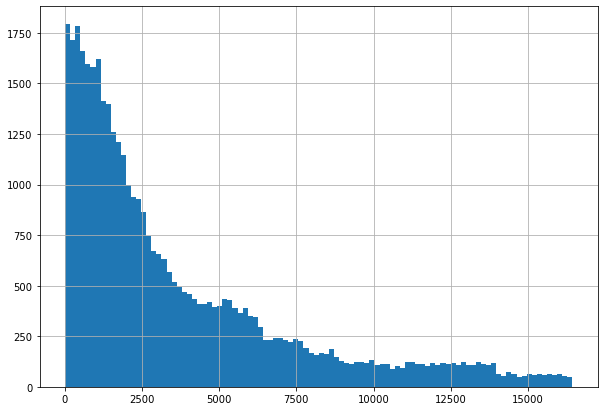

In [242]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

<AxesSubplot:>

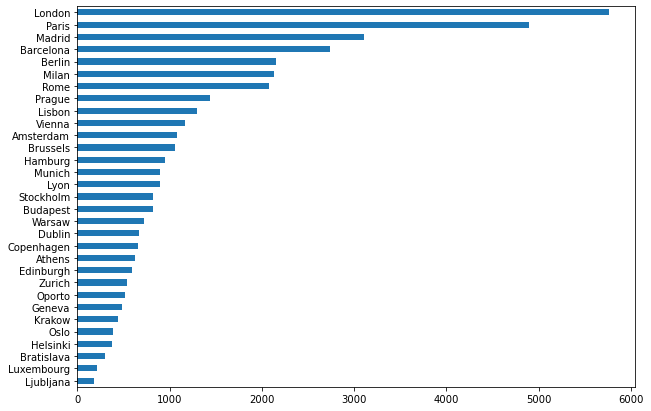

In [243]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

<AxesSubplot:>

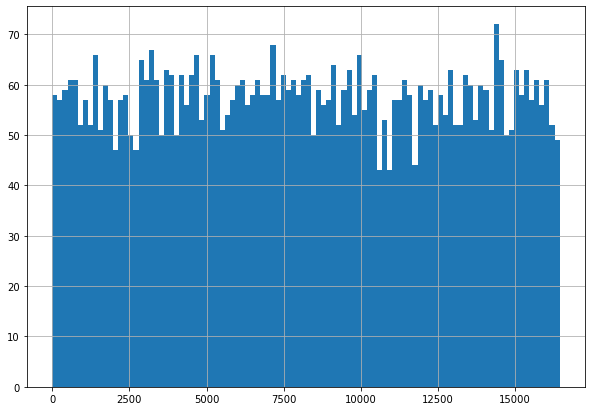

In [244]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

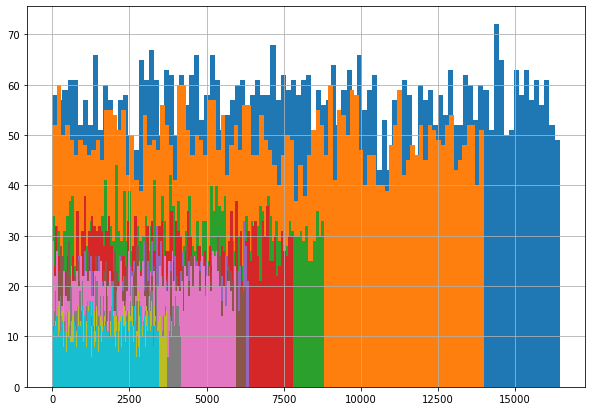

In [245]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

In [246]:
# количество ресторанов в городе
df_train['RestaurantsInCity'] = df_train.groupby('City')['Restaurant_id'].transform('count')
df_train.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,RestaurantsInCity
37673,id_1583,Rome,"['Italian', 'Pizza', 'Mediterranean', 'Vegetar...",1584.0,3.5,$$ - $$$,821.0,"[['No bad, no good', 'Sunday night'], ['12/09/...",/Restaurant_Review-g187791-d2667392-Reviews-Ma...,d2667392,1,2078
36402,id_3334,London,"['Bar', 'European', 'British', 'Vegetarian Fri...",3341.0,3.5,$$ - $$$,369.0,"[['Hit and miss', 'Attentive friendly Staff-gr...",/Restaurant_Review-g186338-d1501528-Reviews-Ro...,d1501528,1,5757
19154,id_1222,Dublin,NaN,1225.0,5.0,NaN,2.0,"[[""Don't pass by this place"", 'Love my Nicos']...",/Restaurant_Review-g186605-d7038606-Reviews-Ni...,d7038606,1,673
3823,id_5391,Madrid,['Spanish'],5394.0,3.5,NaN,32.0,"[[], []]",/Restaurant_Review-g187514-d7742983-Reviews-Ca...,d7742983,1,3108
18324,id_1669,Barcelona,"['Mediterranean', 'European', 'Spanish', 'Vega...",1670.0,4.0,$$$$,377.0,"[['Airy room with delightful food', 'Fantastic...",/Restaurant_Review-g187497-d1074478-Reviews-En...,d1074478,1,2734


In [247]:
# нормализуем Ranking на количество ресторанов в городе
df_train['NormalisedRanking'] = df_train['Ranking'] / df_train['RestaurantsInCity']
df_train.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,RestaurantsInCity,NormalisedRanking
24157,id_13728,Paris,"['Brazilian', 'Sushi', 'South American']",13730.0,2.0,$$$$,NaN,"[['I was expecting more...'], ['10/19/2012']]",/Restaurant_Review-g187147-d810086-Reviews-Tav...,d810086,1,4897,2.803757
39687,id_2220,Amsterdam,['Spanish'],2225.0,5.0,$,5.0,"[['Little deli - authentic Spanish food'], ['0...",/Restaurant_Review-g188590-d3811900-Reviews-Pa...,d3811900,1,1086,2.048803
35517,id_13781,London,['Fast Food'],13791.0,3.5,$,12.0,"[['Food was ok', 'Good fish n chips'], ['04/17...",/Restaurant_Review-g186338-d5244341-Reviews-Mi...,d5244341,1,5757,2.395518
8289,id_5531,Madrid,NaN,5534.0,4.0,NaN,2.0,"[[], []]",/Restaurant_Review-g187514-d13320374-Reviews-T...,d13320374,1,3108,1.780566
35000,id_11930,Paris,"['French', 'Bar', 'European', 'Pub']",11932.0,3.0,$$ - $$$,194.0,"[['Good Fixed Price Lunch', 'One of the best p...",/Restaurant_Review-g187147-d5890589-Reviews-Le...,d5890589,1,4897,2.436594


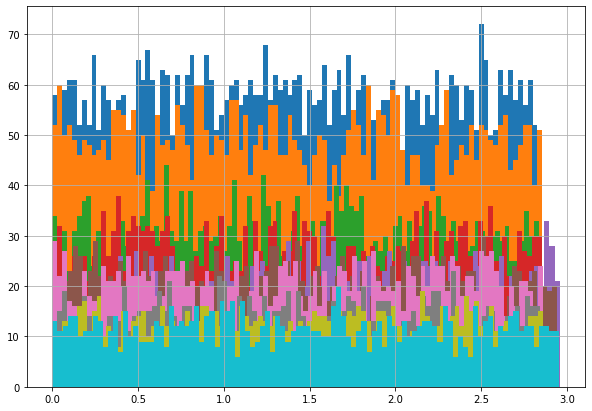

In [248]:
# проверим нормализацию Ranking
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['NormalisedRanking'][df_train['City'] == x].hist(bins=100)
plt.show()

In [249]:
# нормализуем 'Number of Reviews' на количество ресторанов в городе
df_train['NormalisedNumberOfReviews'] = df_train['Number of Reviews'] / df_train['RestaurantsInCity']
df_train.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,RestaurantsInCity,NormalisedRanking,NormalisedNumberOfReviews
13164,id_1429,Milan,"['Italian', 'Pizza', 'Seafood', 'Mediterranean...",1431.0,4.0,$$$$,177.0,"[['Wonderful Dinner Experience', 'Tasty food a...",/Restaurant_Review-g187849-d2535829-Reviews-La...,d2535829,1,2133,0.670886,0.082982
6820,id_127,Munich,"['French', 'International', 'Mediterranean', '...",129.0,4.5,$$$$,86.0,"[['Outstanding food, impeccable service', 'Ano...",/Restaurant_Review-g187309-d5818462-Reviews-ES...,d5818462,1,893,0.144457,0.096305
23326,id_634,Geneva,"['Italian', 'European', 'Pizza', 'Mediterranea...",637.0,3.5,$$ - $$$,93.0,"[['Very accessible', 'Very Good!'], ['01/08/20...",/Restaurant_Review-g188057-d1025410-Reviews-Al...,d1025410,1,481,1.324324,0.193347
13786,id_803,Warsaw,NaN,804.0,4.5,NaN,16.0,"[[""Best gluten free burgers we've ever had!"", ...",/Restaurant_Review-g274856-d8378583-Reviews-Bu...,d8378583,1,727,1.105915,0.022008
38603,id_8664,London,['British'],8673.0,4.0,$,9.0,"[['Lovely little place', 'Good British Breakfa...",/Restaurant_Review-g186338-d3863573-Reviews-Ca...,d3863573,1,5757,1.506514,0.001563


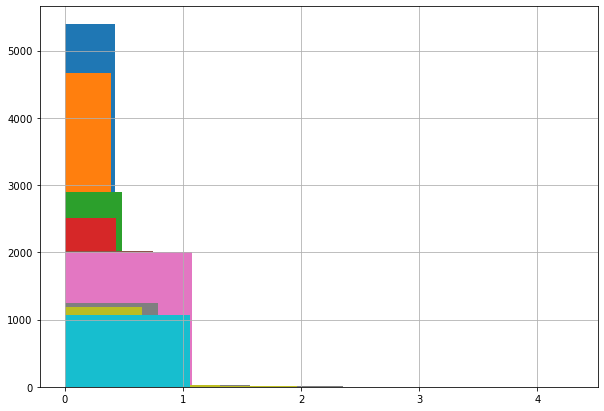

In [250]:
# проверим нормализацию 'Number of Reviews'
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['NormalisedNumberOfReviews'][df_train['City'] == x].hist(bins=4)
plt.show()

### Посмотрим распределение целевой переменной

<AxesSubplot:>

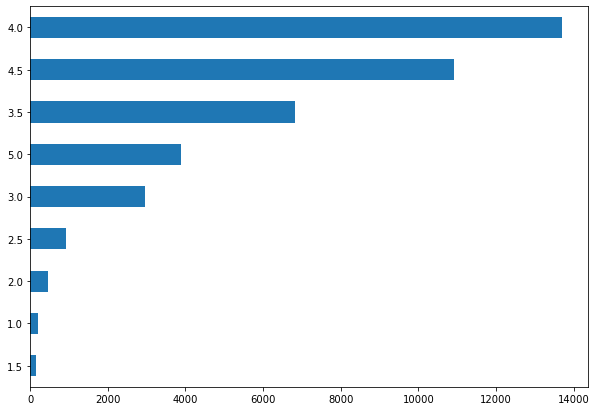

In [251]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

<AxesSubplot:>

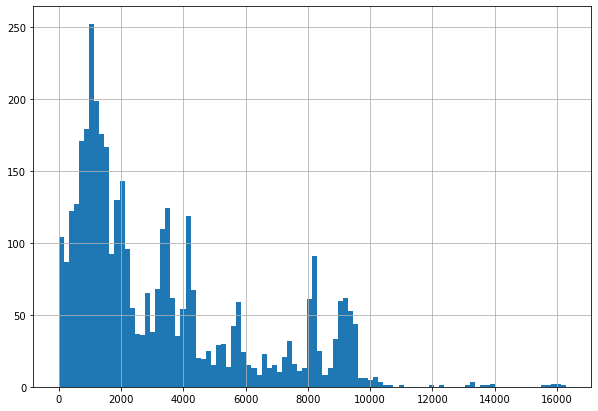

In [252]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

<AxesSubplot:>

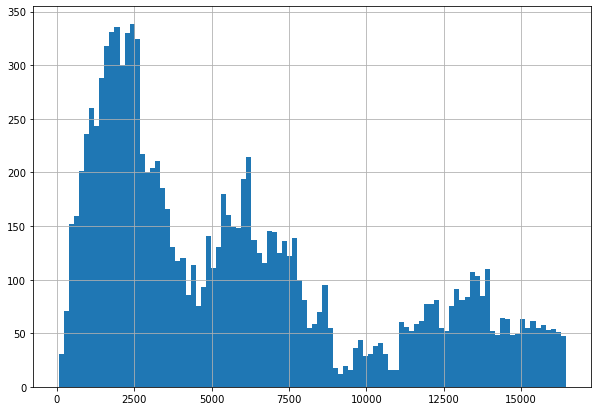

In [253]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

<AxesSubplot:>

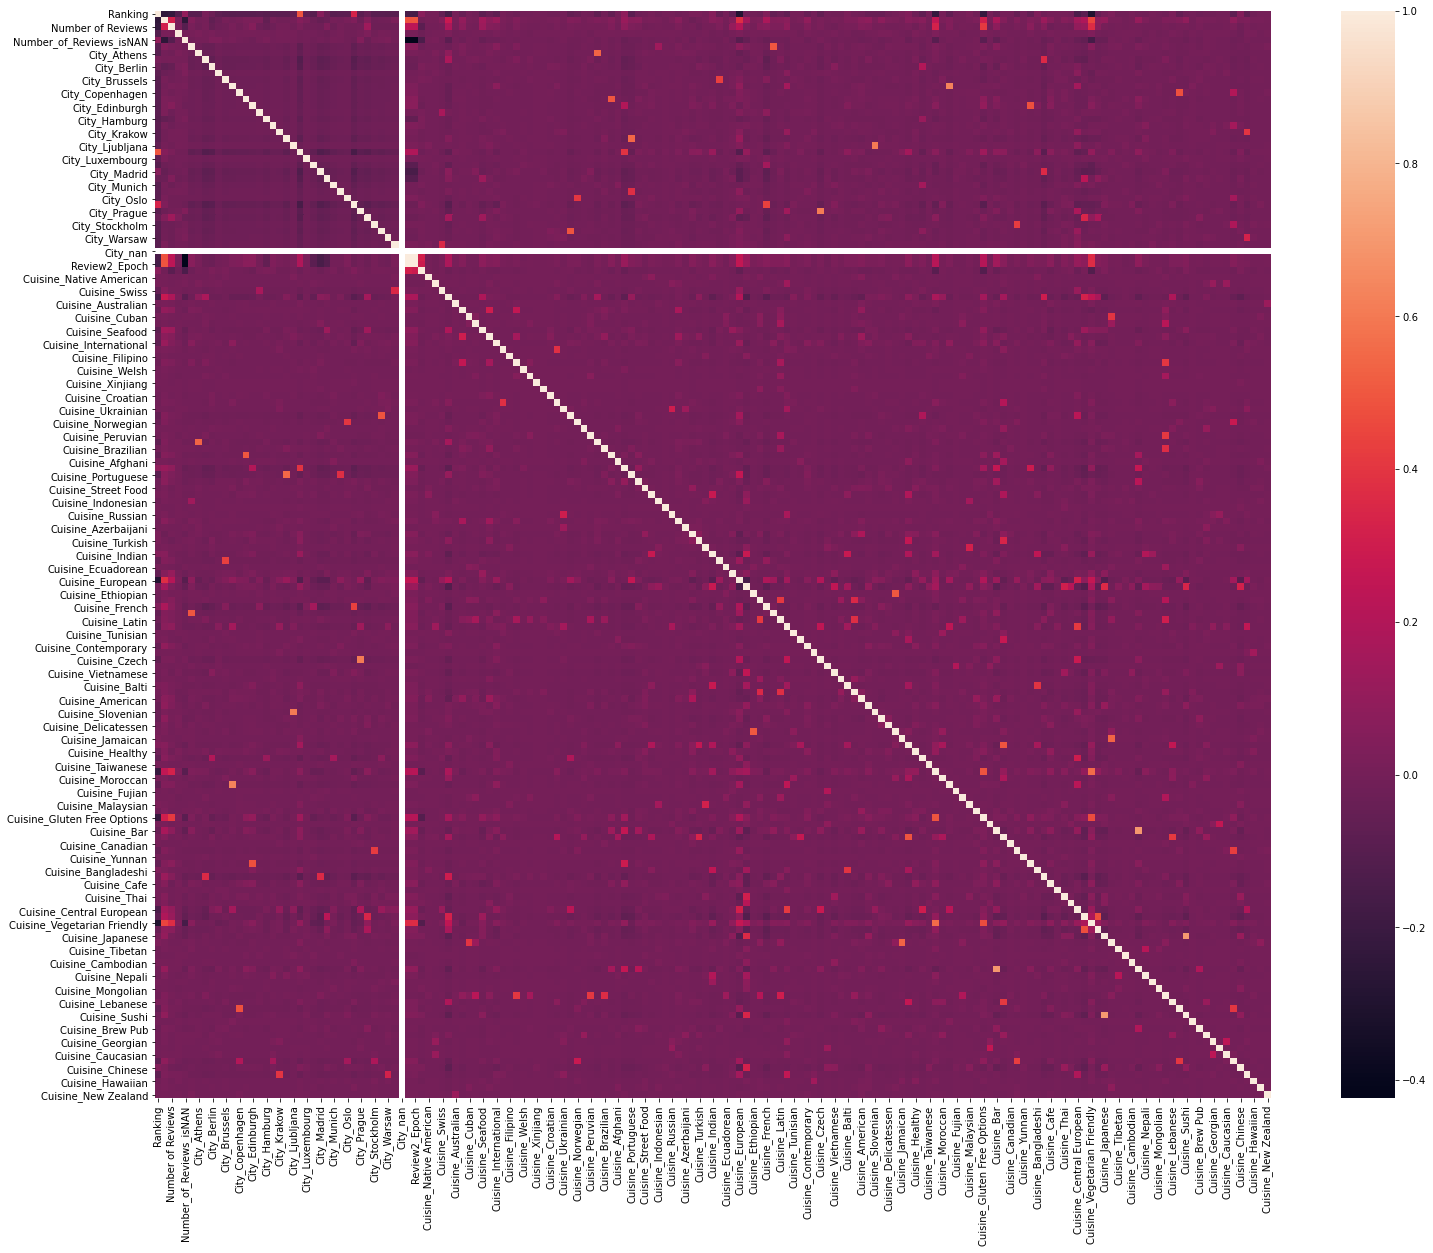

In [254]:
plt.rcParams['figure.figsize'] = (25,20)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [255]:
# на всякий случай, заново подгружаем данные
df_train = pd.read_csv('main_task.csv')
df_test = pd.read_csv('kaggle_task.csv')
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [256]:
import re
from datetime import datetime
from sklearn.preprocessing import PolynomialFeatures 

def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    
    # ################### 1. Предобработка ############################################################## 
    
    # опечатка
    df_output.City = df_output.City.replace(to_replace={'Oporto': 'Porto'})
    
    # добавление признака RestaurantsInCity (количество ресторанов в городе)
    df_output['RestaurantsInCity'] = df_output.groupby('City')['Restaurant_id'].transform('count')
    
    # добавление признака PriceRangeNan (указан Price Range?) - УХУДШИЛО!
    # df_output['PriceRangeNan'] = pd.isna(df_output['Price Range']).astype('uint8')    
    
    # ################### 2. NAN ############################################################## 
    # Далее заполняем пропуски, вы можете попробовать заполнением средним или средним по городу и тд...
    df_output['Number of Reviews'].fillna(0, inplace=True)
    df_output['Cuisine Style'].fillna('', inplace=True)
    
    
    # ################### 3. Encoding ############################################################## 
    
    # колонка 'City'
    df_output = pd.get_dummies(df_output, columns=[ 'City',], dummy_na=True)
        
    # колонка 'Price Range'
    def normalise_price_range(str):
        dict = {"$": 1, "$$ - $$$": 2, "$$$$": 3}
        return dict[str] if str in dict.keys() else 0

    df_output['Price Range'] = df_output['Price Range'].apply(lambda x : normalise_price_range(x))    
    
    # обработаем 'Cuisine Style'
    def parse_cuisines(str):
        str = str.replace("['", "").replace("']", "").replace("', '", ",")
        return str.split(",")

    cuisines = set()

    for value in data['Cuisine Style'].dropna().unique():
        for cuisine in parse_cuisines(value):
            cuisines.add(cuisine)
        
    df_output['Cuisines'] = df_output['Cuisine Style'].apply(lambda x : parse_cuisines(x))

    def find_item(cell):
        if cuisine in cell:
            return 1
        return 0

    for cuisine in cuisines:
        df_output['Cuisine_' + cuisine] = df_output['Cuisines'].apply(find_item)
    
    # ################### 4. Feature Engineering ####################################################

    # добавление признака Review1_Epoch и Review2_Epoch (секунд между первым и вторым ревью и Unix epoch time)
    def parse_review_dates(str):
        pattern = "(\d{2}/\d{2}/\d{4})', '(\d{2}/\d{2}/\d{4})"
        match = re.search(pattern, str) 

        if match:
            dates = match.group().replace("', '", ",").split(',')
            if len(dates) != 2:
                return [0, 0]
            return [datetime.strptime(dates[0], '%m/%d/%Y').timestamp(), datetime.strptime(dates[1], '%m/%d/%Y').timestamp()]
        else:
            return [0, 0]
    
    df_output['Reviews'].fillna("", inplace=True)
    df_output['Review1_Epoch'] = df_output['Reviews'].apply(lambda x : parse_review_dates(x)[0])
    df_output['Review2_Epoch'] = df_output['Reviews'].apply(lambda x : parse_review_dates(x)[1])    
    
    # добавление признака Between_Reviews (разница в секундах между ревью)
    def calc_between_reviews(str):
        dates = parse_review_dates(str)
        if dates[0] == 0 or dates[1] == 0:
            return 0
        else:
            return abs(dates[0] - dates[1])

    df_output['Between_Reviews'] = df_output['Reviews'].apply(lambda x : calc_between_reviews(x))
    
    # добавление признака NormalisedRanking (нормализуем Ranking на количество ресторанов в городе)
    df_output['NormalisedRanking'] = df_output['Ranking'] / df_output['RestaurantsInCity']
    
    # добавление признака NormalisedNumberOfReviews (нормализуем 'Number of Reviews' на количество ресторанов в городе) - УХУДШИЛО!
    # df_output['NormalisedNumberOfReviews'] = df_output['Number of Reviews'] / df_output['RestaurantsInCity']
    
    # ################### 5. Clean #################################################### 
    
    # убираем не нужные для модели признаки
    df_output.drop(['Restaurant_id', 'ID_TA'], axis = 1, inplace=True)
    
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis = 1, inplace=True)
    
    return df_output

>По хорошему, можно было бы перевести эту большую функцию в класс и разбить на подфункции (согласно ООП). 

#### Запускаем и проверяем что получилось

In [257]:
df_preproc = preproc_data(data)
df_preproc.sample(10)

,Ranking,Price Range,Number of Reviews,sample,Rating,RestaurantsInCity,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,...,Cuisine_Scandinavian,Cuisine_Chinese,Cuisine_Polish,Cuisine_Hawaiian,Cuisine_Cajun & Creole,Cuisine_New Zealand,Review1_Epoch,Review2_Epoch,Between_Reviews,NormalisedRanking
8769,348.0,2,388.0,0,0.0,1816,0,0,0,0,...,0,0,0,0,0,0,1.512943e+09,1.510006e+09,2937600.0,0.191630
43095,3551.0,0,4.0,1,5.0,2705,0,0,0,1,...,0,0,0,0,0,0,0.000000e+00,0.000000e+00,0.0,1.312754
22462,5168.0,3,8.0,1,4.0,3395,0,0,1,0,...,0,0,0,0,0,0,1.505596e+09,1.463778e+09,41817600.0,1.522239
11451,1915.0,0,7.0,1,4.0,1314,0,0,0,0,...,0,0,0,0,0,0,1.511820e+09,1.487196e+09,24624000.0,1.457382
9152,509.0,2,40.0,0,0.0,554,0,0,0,0,...,0,0,0,0,0,0,1.492549e+09,1.487455e+09,5094000.0,0.918773
37401,443.0,2,389.0,1,4.0,2705,0,0,0,1,...,0,0,0,0,0,0,1.514326e+09,1.511647e+09,2678400.0,0.163771
5240,904.0,2,16.0,0,0.0,1186,0,0,0,0,...,0,0,0,0,0,0,1.507064e+09,1.476738e+09,30326400.0,0.762226
40667,1175.0,2,41.0,1,4.5,2705,0,0,0,1,...,0,0,0,0,0,0,1.511129e+09,1.491426e+09,19702800.0,0.434381
35935,1207.0,2,347.0,1,4.0,7193,0,0,0,0,...,0,0,0,0,0,0,1.512857e+09,1.511820e+09,1036800.0,0.167802
38875,1104.0,1,15.0,1,4.0,1186,0,0,0,0,...,0,0,0,0,0,0,1.462136e+09,1.439759e+09,22377600.0,0.930860


In [258]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 167 entries, Ranking to NormalisedRanking
dtypes: float64(7), int64(128), uint8(32)
memory usage: 53.0 MB


In [259]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [260]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [261]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 166), (40000, 166), (40000, 165), (32000, 165), (8000, 165))

# Model 
Сам ML

In [262]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [263]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [264]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


In [265]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.20236374999999998


<AxesSubplot:>

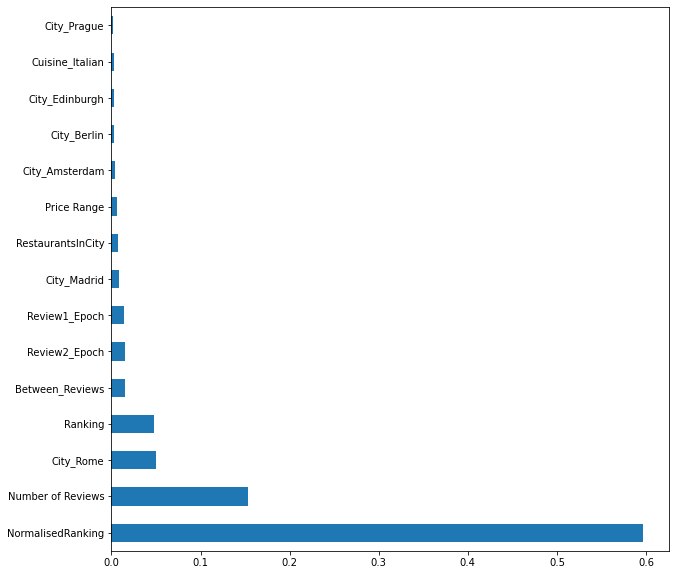

In [266]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [267]:
test_data.sample(10)

,Ranking,Price Range,Number of Reviews,Rating,RestaurantsInCity,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Bratislava,...,Cuisine_Scandinavian,Cuisine_Chinese,Cuisine_Polish,Cuisine_Hawaiian,Cuisine_Cajun & Creole,Cuisine_New Zealand,Review1_Epoch,Review2_Epoch,Between_Reviews,NormalisedRanking
3512,9303.0,0,5.0,0.0,6108,0,0,0,0,0,...,0,0,0,0,0,0,0.000000e+00,0.000000e+00,0.0,1.523084
9115,1297.0,2,39.0,0.0,836,0,0,0,0,0,...,0,0,0,0,0,0,1.511129e+09,1.508879e+09,2250000.0,1.551435
2725,7716.0,2,66.0,0.0,7193,0,0,0,0,0,...,0,0,0,0,0,0,1.489442e+09,1.507237e+09,17794800.0,1.072710
8319,305.0,2,2760.0,0.0,2589,0,0,0,0,0,...,0,0,0,0,0,0,1.515449e+09,1.515276e+09,172800.0,0.117806
6497,15409.0,1,15.0,0.0,7193,0,0,0,0,0,...,0,1,0,0,0,0,1.491685e+09,1.490134e+09,1551600.0,2.142222
3818,3896.0,2,97.0,0.0,6108,0,0,0,0,0,...,0,0,0,0,0,0,1.492117e+09,1.491772e+09,345600.0,0.637852
2137,11165.0,2,22.0,0.0,7193,0,0,0,0,0,...,0,0,0,0,0,0,1.500498e+09,1.499980e+09,518400.0,1.552204
6428,85.0,2,74.0,0.0,488,0,0,0,0,0,...,0,0,0,0,0,0,1.508792e+09,1.506632e+09,2160000.0,0.174180
4993,4261.0,2,9.0,0.0,2589,0,0,0,0,0,...,0,0,0,0,0,0,0.000000e+00,0.000000e+00,0.0,1.645809
9334,1774.0,0,6.0,0.0,925,0,0,0,0,0,...,0,0,0,0,0,0,1.483826e+09,1.468703e+09,15123600.0,1.917838


In [268]:
test_data = test_data.drop(['Rating'], axis=1)

In [269]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [270]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


In [271]:
predict_submission

array([3.02 , 4.235, 4.445, ..., 3.065, 4.49 , 4.245])

In [272]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.020
1,id_1,4.235
2,id_2,4.445
3,id_3,4.340
4,id_4,4.465
5,id_5,4.360
6,id_6,2.550
7,id_7,2.350
8,id_8,4.035
9,id_9,4.630
